In [2]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
data=pd.read_csv('50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
x=data.drop(columns=['Profit'])
y=data['Profit']

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [5]:
print(data.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [6]:
data = pd.get_dummies(data, columns=['State'], drop_first=False)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [7]:
x=data.drop(columns=['Profit'])
y=data['Profit']

In [8]:
print(data.isnull().sum())

R&D Spend           0
Administration      0
Marketing Spend     0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64


In [9]:
data=data.dropna()#drops the rows with missing values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False


In [36]:
data=data.astype(int)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349,136897,471784,192261,0,0,1
1,162597,151377,443898,191792,1,0,0
2,153441,101145,407934,191050,0,1,0
3,144372,118671,383199,182901,0,0,1
4,142107,91391,366168,166187,0,1,0


In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred=model.predict(x_test)

In [23]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349,136897,471784,192261,0,0,1
1,162597,151377,443898,191792,1,0,0
2,153441,101145,407934,191050,0,1,0
3,144372,118671,383199,182901,0,0,1
4,142107,91391,366168,166187,0,1,0


In [20]:
mse=mean_squared_error(y_test,y_pred)
print(mse)
print(model.coef_,model.intercept_)

82010363.0442352
[ 8.05630064e-01 -6.87878823e-02  2.98554429e-02 -3.15260255e+02
  6.23532751e+02 -3.08272495e+02] 54343.29984897951


In [18]:
! pip install matplotlib 

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----------- ---------------------------- 2.4/8.0 MB 11.9 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.0 MB 11.9 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------------------------------------- - 2.1/2.2 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 10.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.6 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 7.8 MB/s eta 0:00:00


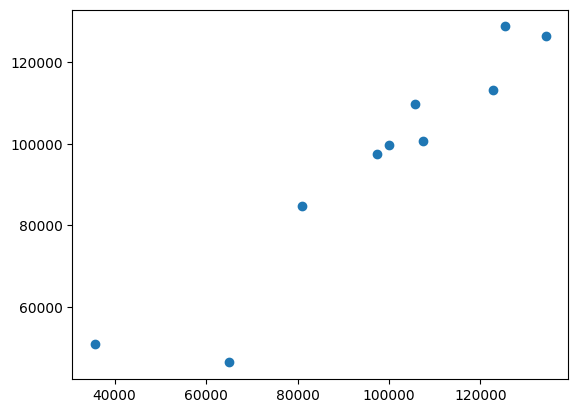

In [19]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.show()